In [26]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [27]:
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day19-understanding-your-data-descriptive-stats/train.csv"
df = pd.read_csv(url, usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
df['Age'].isnull().sum()

177

In [29]:
df['Age'].fillna(df['Age'].mean(),inplace= True)

In [30]:
#X = df[['Age', 'Fare']]
#y = df['Survived']
X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\uqba2\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


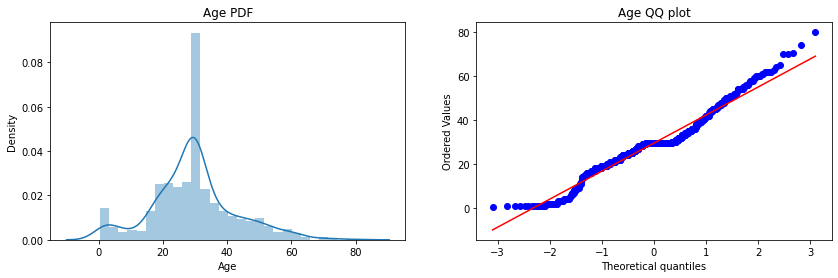

In [31]:
# check the normal distribution

# Probability distribution
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

# QQ PLot
plt.subplot(122)
stats.probplot(X_train['Age'], dist= "norm", plot = plt)
plt.title("Age QQ plot")
plt.show()

c:\Users\uqba2\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


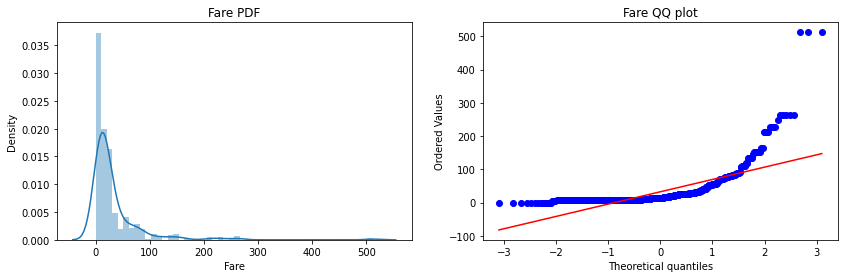

In [32]:
# Probability distribution
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

# QQ PLot
plt.subplot(122)
stats.probplot(X_train['Fare'], dist= "norm", plot = plt)
plt.title("Fare QQ plot")
plt.show()

In [33]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [34]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR :", accuracy_score(y_test, y_pred))
print("Accuracy DT :", accuracy_score(y_test, y_pred2))

Accuracy LR : 0.6480446927374302
Accuracy DT : 0.6927374301675978


In [35]:
trf = FunctionTransformer(func=np.log1p)                          # np.log simply apply log but if we have 0 value then its wrong 
                                                                  # np.log1p add 1 so its not have 0 value                                                                  

In [36]:
X_train_transformed = trf.fit_transform(X_train)                 # test
X_test_transformed = trf.transform(X_test)                       # prediction

In [37]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Accuracy LR :", accuracy_score(y_test, y_pred))
print("Accuracy DT :", accuracy_score(y_test, y_pred2))

Accuracy LR : 0.6815642458100558
Accuracy DT : 0.6759776536312849


In [38]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_predict(clf, X_transformed, y, cv= 10)))
print("DT",np.mean(cross_val_predict(clf2, X_transformed, y,  cv= 10)))

LR 0.2570145903479237
DT 0.3288439955106622


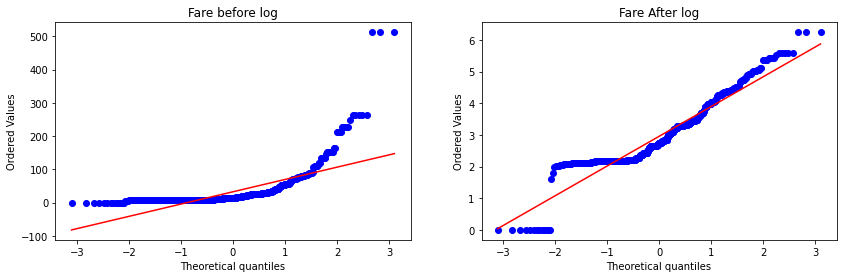

In [39]:
# Probability distribution
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist= "norm", plot= plt)
plt.title('Fare before log')

# QQ PLot
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist= "norm", plot = plt)
plt.title("Fare After log")
plt.show()

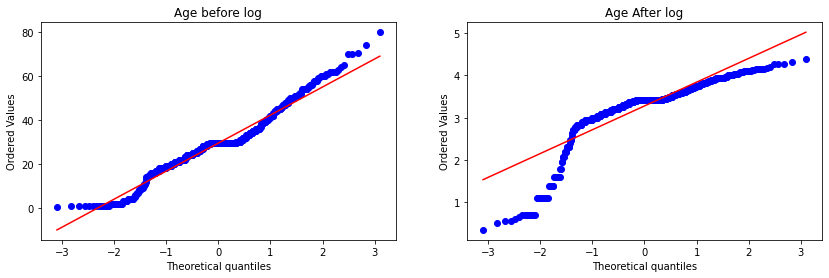

In [40]:
# Probability distribution
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist= "norm", plot= plt)
plt.title('Age before log')

# QQ PLot
plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist= "norm", plot = plt)
plt.title("Age After log")
plt.show()

In [41]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p),['FAre'])], remainder='passthrough')

X_train_transformed2 = trf.fit_transform(X_train)
X_test_transformed2 = trf.transform(X_test)

In [42]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [43]:
clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

DecisionTreeClassifier()

In [44]:
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

In [45]:
print("Accuracy LR :", accuracy_score(y_test, y_pred))
print("Accuracy DT :", accuracy_score(y_test, y_pred2))

Accuracy LR : 0.6815642458100558
Accuracy DT : 0.6815642458100558


In [46]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log', FunctionTransformer(transform),['Fare'])], remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6442446941323345


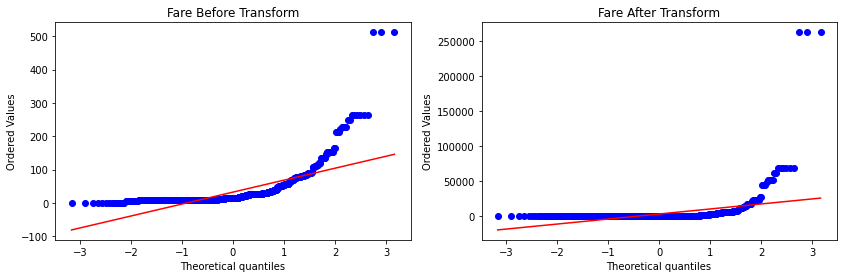

In [47]:
apply_transform(lambda x:x**2)

Accuracy 0.6195131086142323


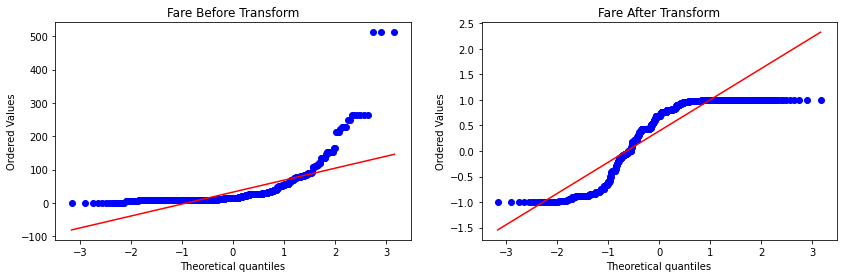

In [48]:
apply_transform(np.sin)